In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.externals import joblib

In [2]:
%run '../code/constants.py'
%run '../code/feature_selection.py'
%run '../code/evaluate.py'

In [3]:
df = pd.read_pickle(path + fin_mod_df)
X, y = get_x_y(df)
X_train, X_test, y_train, y_test = split_latest(X, y)

Use pipeline from final model on split out training set 

In [4]:
pl = joblib.load('../outputs/CBB_model_v2.pkl')

In [5]:
pl.fit(X_train, y_train)

/Users/xiaowei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


PMMLPipeline(steps=[('impute', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)),
       ('standardize', StandardScaler(copy=True, with_mean=True, with_std=False)),
       ('clf', LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [6]:
print(proba_scorer(y_test, pl.predict_proba(X_test), roc_auc_score))

0.583902781662


In [7]:
X.columns

Index(['clear-bank-behavior.cbb-reason-codes.BB113',
       'request.merchant.subgroup_corporate',
       'pmml_variables.cbb_num_closures_one_year_ago',
       'fis-chex-advisor.debit-bureau-reason-codes.EB',
       'clear-bank-behavior.cbb-reason-codes2.BB211',
       'pmml_variables.fe_related_location_blacklisted',
       'third_party.clarity_cbb.backend_extra_variables.is_cache_response',
       'pmml_variables.fe_user_location_state_mismatch',
       'pmml_variables.fe_merchant_id_92',
       'third_party.clarity_cbb.clear-bank-behavior.cbb-score',
       'clear-bank-behavior.cbb-reason-codes2.BB201',
       'clear-bank-behavior.cbb-reason-codes2.BB209',
       'third_party.clarity_cbb.clear-bank-behavior.positive-check-writing-history',
       'clear-bank-behavior.cbb-reason-codes.BB105',
       'fis-chex-advisor.debit-bureau-reason-codes.EH',
       'third_party.clarity_cbb.clear-bank-behavior.fis-chex-advisor.number-closures.three-years-ago',
       'clear-bank-behavior.reason

In [10]:
def sigmoid(series):
    return 1 / (1 + np.exp(-series))

In [12]:
print(roc_auc_score(y_test, sigmoid(X_test['reversed_score'])))

0.532259380271


Compare final model vs v4

In [14]:
predicted = pl.predict_proba(X)[:,1]
decision_score = sigmoid(X['reversed_score']).values

In [15]:
df_cuts = pd.DataFrame({'predicted': predicted, 'v4': decision_score, 'y': y})

In [16]:
decile_preds_df = perc_grps(df_cuts.set_index('predicted').y)
decile_preds_df

Group  Defaults  Count  Pred Ratio     Ratio
0     Top 0% - 10%       411   3803    0.115680  0.108073
1    Top 10% - 20%       535   3803    0.141095  0.140678
2    Top 20% - 30%       612   3803    0.156336  0.160926
3    Top 30% - 40%       576   3803    0.168287  0.151459
4    Top 40% - 50%       653   3803    0.179339  0.171707
5    Top 50% - 60%       720   3803    0.190295  0.189324
6    Top 60% - 70%       789   3803    0.202966  0.207468
7    Top 70% - 80%       840   3803    0.218390  0.220878
8    Top 80% - 89%       911   3803    0.242538  0.239548
9    Top 89% - 99%      1153   3803    0.308199  0.303182
10  Top 99% - 109%         1      4    0.617399  0.250000

In [17]:
decile_v4_df = perc_grps(df_cuts.set_index('v4').y)
decile_v4_df

Group  Defaults  Count  Pred Ratio     Ratio
0     Top 0% - 10%       646   3803    0.086740  0.169866
1    Top 10% - 20%       604   3803    0.092433  0.158822
2    Top 20% - 30%       649   3803    0.098323  0.170655
3    Top 30% - 40%       666   3803    0.104508  0.175125
4    Top 40% - 50%       699   3803    0.111485  0.183802
5    Top 50% - 60%       673   3803    0.119269  0.176966
6    Top 60% - 70%       761   3803    0.127696  0.200105
7    Top 70% - 80%       740   3803    0.137068  0.194583
8    Top 80% - 89%       721   3803    0.159436  0.189587
9    Top 89% - 99%      1040   3803    0.234451  0.273468
10  Top 99% - 109%         2      4    0.447824  0.500000

In [18]:
df_cuts.describe()

predicted            v4             y
count  38034.000000  38034.000000  38034.000000
mean       0.192357      0.127175      0.189331
std        0.054706      0.045408      0.391776
min        0.063883      0.080077      0.000000
25%        0.156493      0.098299      0.000000
50%        0.184619      0.115375      0.000000
75%        0.217964      0.136948      0.000000
max        0.661082      0.449148      1.000000

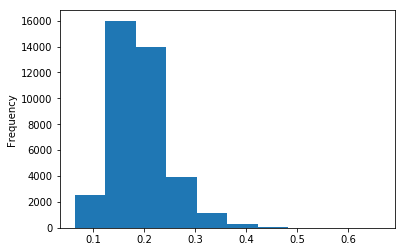

In [19]:
df_cuts.predicted.plot('hist')

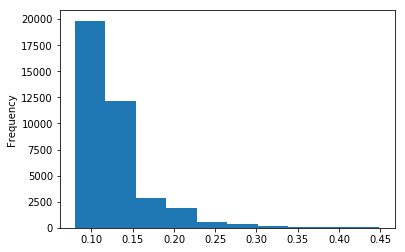

In [20]:
df_cuts.v4.plot('hist')